# Analysis helping episodes
Goal Inference Results During Helpign

In [2]:
import glob
import pickle as pkl
from matplotlib import pyplot as plt
import brokenaxes

ModuleNotFoundError: No module named 'brokenaxes'

In [ ]:
pwd

In [ ]:
paths_dict = {
    'VAE': 'outputs/helping_states_ip1_newvaefull_encoder_task_graph.kl0.001_20_1.0_1.0_5.0',
    'DET': 'outputs/helping_states_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0',
    'GT': 'outputs/helping_gt_goal'
}

In [3]:
def build_path(goal='GT'):
    # init_path = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences/'
    init_path = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/'
    path = '{}/{}/test_env_task_set_60_full_task.all'.format(init_path, paths_dict[goal])
    paths = glob.glob('{}/logs*'.format(path))
    
    cont_dict = {}
    ind = 4
    path_res = '{}/results_{}.pik'.format(path, ind)
    with open(path_res, 'rb') as f:
        cont = pkl.load(f)
    path_dict = {}
    for path in paths:
        path_index = path.split('.')[-3].split('_')[0]
        seed_index = path.split('.')[-2]
        path_dict[(int(path_index), int(seed_index))] = path
    return path_dict, cont

def find_strange_episodes(cont):
    index_bad = []
    res_bad = []
    for index, elem in cont.items():
        if min(elem['L']) < 100 and max(elem['L']) == 250:
            index_bad.append(index)
            res_bad.append(elem['L'])
    return index_bad, res_bad

## What happens with episodes that have the 250 and then low?


In [11]:
import glob
paths_dict = {
    'DET': 'outputs/helping_states_fastwalk_r_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0',
    'GT': 'outputs/helping_gt_goal'
}

In [12]:
def build_path(goal='GT', tianmin=False):
    if tianmin:
        init_path = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences/'
    else:
        init_path = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/'
    path = '{}/{}/test_env_task_set_60_full_task.all'.format(init_path, paths_dict[goal])
    print(path)
    paths = glob.glob('{}/logs*'.format(path))
    
    cont_dict = {}
    ind = 2
    path_res = '{}/results_{}.pik'.format(path, ind)
    with open(path_res, 'rb') as f:
        cont = pkl.load(f)
    path_dict = {}
    for path in paths:
        path_index = path.split('.')[-3].split('_')[0]
        seed_index = path.split('.')[-2]
        try:
            path_dict[(int(path_index), int(seed_index))] = path
        except:
            pass
    return path_dict, cont

In [13]:
tianmin = build_path(goal='DET', tianmin=True)
# tianmin = build_path(goal='DET', tianmin=)
gt = build_path(goal='GT')

/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences//outputs/helping_states_fastwalk_r_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all
/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences//outputs/helping_gt_goal/test_env_task_set_60_full_task.all


In [14]:
for index in tianmin[1].keys():
    print(index, 'DET', tianmin[1][index]['S'], 'GT', gt[1][index]['L'])

3 DET [1, 1, 1] GT [35, 35, 40]
139 DET [1, 1, 1] GT [42, 40, 46]
162 DET [1, 1, 1] GT [74, 69, 97]
180 DET [0, 1, 0] GT [65, 60, 59]
193 DET [1, 1, 1] GT [61, 61, 80]
225 DET [1, 1, 1] GT [30, 20, 29]
290 DET [1, 1, 1] GT [56, 57, 52]
304 DET [1, 1, 1] GT [65, 65, 74]
323 DET [0, 1, 1] GT [22, 24, 22]
366 DET [1, 1, 1] GT [45, 44, 48]
401 DET [1, 1, 1] GT [82, 82, 82]
419 DET [1, 1, 1] GT [28, 29, 26]
428 DET [1, 1, 1] GT [68, 68, 67]
466 DET [1, 1, 1] GT [18, 14, 17]
523 DET [1, 1, 0] GT [60, 70, 77]
556 DET [1, 1, 0] GT [56, 64, 55]
573 DET [0, 0, 1] GT [28, 31, 38]
591 DET [0, 0, 1] GT [31, 31, 31]
606 DET [1, 1, 1] GT [250, 250, 250]
621 DET [1, 1, 1] GT [18, 19, 28]


In [15]:
with open(tianmin[0][573,0], 'rb') as f:
    cont = pkl.load(f)

In [16]:
np.linspace(0,3, 4+1)

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

In [17]:
import math
import cv2
from scipy.ndimage import interpolation



In [18]:

def bin_data(res, length, nbins=20, debug=False):
    # put data in nbins according to episode length
    # res: #seeds x time_steps 

    nseeds = res.shape[0]
    bin_data = np.zeros((nbins, nseeds))
    for seed in range(nseeds):
        zoom_val = nbins*1.0 / length
        val = interpolation.zoom(res[seed, :length], zoom_val)
        try:
            bin_data[:, seed] = val
        except:
            ipdb.set_trace()
    points_interp = np.linspace(0, length-1, nbins)

    bin_data_mean = bin_data.mean(1)
    return bin_data_mean


In [60]:
import numpy as np
import ipdb
with open('../metadata/pred_dict.pkl', 'rb') as f:
    predicate_dict = pkl.load(f)
predicate_dict = {pred_name: index for index, pred_name in enumerate(predicate_dict)}



def obtain_metrics(pred_graphs, task_graph_gt):
    if len(pred_graphs) == 0:
        return {
            "recall": 0,
            "recallmax": 0,
            "accuracy": 0,
            "accuracymax": 0,
            "precision": 1.0,
            "precisionmax": 1.0,
        }

    eps = 1e-9


#     # sort according to category
#     max_vec = np.array([int(x) for x in max_vec.split()])
    pred_task = np.concatenate([pred_graph[None, ...] for pred_graph in pred_graphs])
    gt_task = task_graph_gt[None, ...]

    pos_gt_p = (gt_task > 0) / ((gt_task > 0).sum(-1)[..., None] + eps)
    pred_p = (pred_task > 0) / ((pred_task > 0).sum(-1)[..., None] + eps)

    accuracy = (((gt_task == pred_task) * pos_gt_p).sum(-1)).mean(0)[None, ...]
    recall = (np.minimum(pred_task, gt_task).sum(-1) / (eps + gt_task.sum(-1))).mean(0)[
        None, ...
    ]
    prec = (np.minimum(pred_task, gt_task).sum(-1) / (eps + pred_task.sum(-1))).mean(0)[
        None, ...
    ]

    accuracymax = (((gt_task == pred_task) * pos_gt_p).sum(-1)).max(0)[None, ...]
    recallmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps + gt_task.sum(-1))).max(
        0
    )[None, ...]
    precmax = (np.minimum(pred_task, gt_task).sum(-1) / (eps + pred_task.sum(-1))).max(
        0
    )[None, ...]

    return {
        "recall": recall,
        "recallmax": recallmax,
        "accuracy": accuracy,
        "accuracymax": accuracymax,
        "precision": prec,
        "precisionmax": precmax,
    }

def get_tensor_from_prednames(pred_names):
    res = np.zeros(136)
    indices_and_values = [(predicate_dict[pred_name], value) for pred_name, value in pred_names.items()]
    indices = [v[0] for v in indices_and_values]
    values = [v[1] for v in indices_and_values]
    res[indices] = values
    return res 

def compute_metrics_episode(cont, nbins=20):
    
    # TODO: later hopefully we have an easier way to get gT goal
    cont_id = list(cont['gt_goals'].values())[0]['container_ids'][0]
    goal_name = [node['class_name'] for node in cont['graph'][0]['nodes'] if node['id'] == cont_id][0]
    
    gt_goal = {(gname.split('_')[1], goal_name): g['count'] for gname, g in cont['gt_goals'].items()}
    
    task_graph_gt = get_tensor_from_prednames(gt_goal)
    curr_metrics = []
    pred_graphs = []
    for tstep, proposal in enumerate(cont['proposals']):
        pred_graphs = []
        for p_id, particle in proposal.items():
            graph_pred = get_tensor_from_prednames(particle['pred'][-1][0])
            pred_graphs.append(graph_pred)
        curr_metrics.append(obtain_metrics(pred_graphs, task_graph_gt))
    
    # Aggregate metrics over tsteps
    final_metric_dict = {}
#     ipdb.set_trace()
    for metric_name in curr_metrics[0].keys():
        final_metric_tsteps = np.array(
            [metric[metric_name] for metric in curr_metrics]
        ).reshape(-1).astype(np.float32)
        if nbins is not None:
                
            curr_len = final_metric_tsteps.shape[0]
            final_metric_tsteps = bin_data(final_metric_tsteps[None, :], curr_len, nbins)
        
        final_metric_dict[metric_name] = final_metric_tsteps
    return final_metric_dict


In [131]:
from tqdm import tqdm 
def take_average(list_metrics):
    num_t = len(list_metrics)
    if (num_t == 0):
        ipdb.set_trace()
    res_mean, res_std = {}, {}
    for name in list_metrics[0].keys():
        res_mean[name] = np.concatenate([metric[name][None, ...] for metric in list_metrics]).mean(0)
        res_std[name] = np.concatenate([metric[name][None, ...] for metric in list_metrics]).std(0) / np.sqrt(num_t)
    return res_mean, res_std
    
def plot_episodes(file_eps, episode_ids):
    total_res = []
    for episode_id in tqdm(episode_ids):
        res = file_eps[1][episode_id]
        seeds = [ind for ind, val in enumerate(res['S']) if val == 1]
        if len(seeds) == 0:
            continue
        all_res = []
        for seed in seeds:
            # Load file
            with open(file_eps[0][(episode_id, seed)], 'rb') as f:
                cont = pkl.load(f)
            final_metric_dict = compute_metrics_episode(cont)
            
            all_res.append(final_metric_dict)
        # Average over seeds
        
        mean, std = take_average(all_res)
        total_res.append(mean)
#     ipdb.set_trace()
    return take_average(total_res)

In [70]:
with open('../metadata/task_name_dict.pik', 'rb') as f:
    cont_tasks = pkl.load(f)

In [156]:
cont_tasks['test']['prepare_food']

{152,
 153,
 154,
 155,
 156,
 157,
 158,
 162,
 163,
 166,
 168,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 185,
 186,
 187,
 188,
 190,
 192,
 193,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 207,
 208,
 225,
 229,
 233,
 234,
 245,
 253,
 259,
 269}

In [71]:
task_results = {}
task_names = cont_tasks['test'].keys()
for task_name in task_names:
    episodes = list(sorted(set([epi[0] for epi in tianmin[0] if epi[0] in cont_tasks['test'][task_name]])))
    mean_metric, std_metric = plot_episodes(tianmin, episodes)
    task_results[task_name] = (mean_metric, std_metric)



  0%|                                                                                                                                                                                                                                                                                                                                               | 0/4 [00:00<?, ?it/s]

 25%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                                                                     | 1/4 [00:02<00:07,  2.42s/it]/tmp/ipykernel_38503/4264028327.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=ob

 25%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                                                                     | 1/4 [00:00<00:01,  1.61it/s]

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                   | 2/4 [00:01<00:01,  1.48it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     

In [157]:
episodes

[162, 180, 193, 225]

(3, 2)


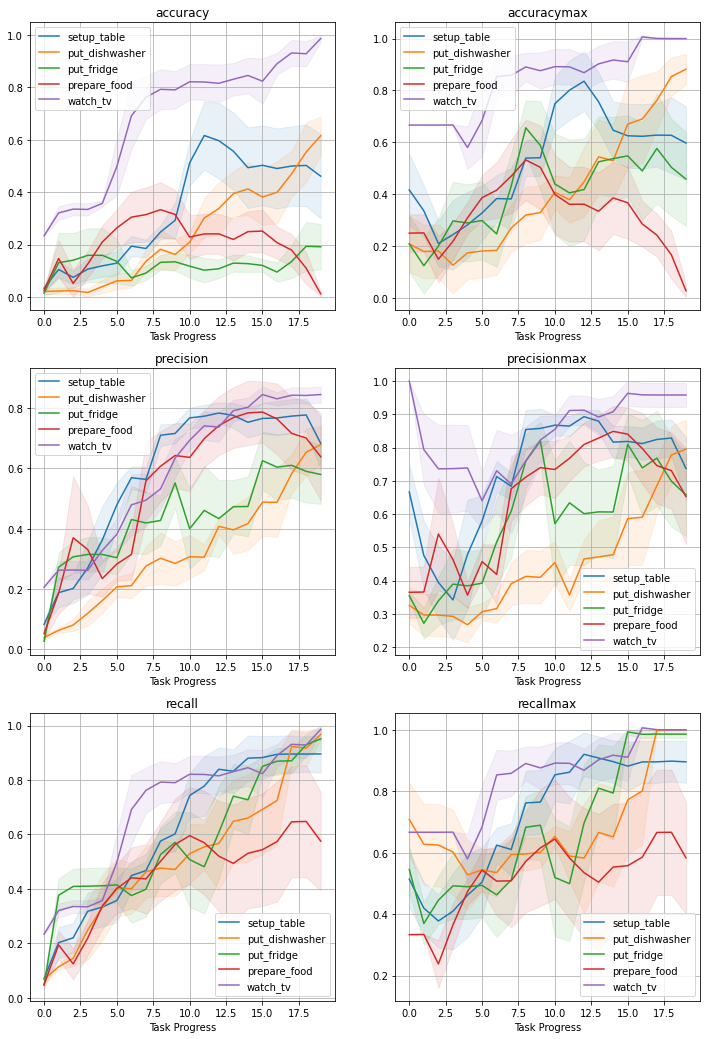

In [87]:
names = mean_metric.keys()
names = sorted([name for name in names])
fig, ax_plots = plt.subplots(int(len(names)/2), 2, figsize=(12, 3*len(names)))
names_exp = ['DET']
final_metric_dict = mean_metric
ax = plt.gca()
task_names = list(task_results.keys())
print(ax_plots.shape)
colors=[next(ax._get_lines.prop_cycler)['color'] for _ in range(len(task_names))]
for i, task_name in enumerate(task_names):
    color = colors[i]
    cname = task_name
    content = task_results[task_name][0]
    std_metric = task_results[task_name][1]
    
    for index, name_metric in enumerate(names):
    #         color=colors[index_exp]
        curr_ax = ax_plots[index//2, index%2]
        nb = len(content[name_metric])
        x = np.arange(nb)
    #         print(name_metric, x.shape, mean_return.shape)
        mean_return = content[name_metric]
        mean_se = std_metric[name_metric]
        ymin = mean_return - mean_se
        ymax = mean_return + mean_se
        curr_ax.plot(x, mean_return, label=cname, color=color)
        curr_ax.fill_between(x, ymin, ymax, alpha=0.1, color=color)

        
for ind, ax in enumerate(list(ax_plots.reshape(-1))):
    
    ax.legend()
    ax.set_title(names[ind])
    ax.grid()
    ax.set_xlabel("Task Progress")

In [129]:
tshu_dir = '/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences'

paths_dict = {
     "Uniform": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip1_uniform_20_1.0_1.0_5.0",
     "w/o InvPlanning": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip0_detfull_encoder_task_graph_20_1.0_1.0_5.0",
     "1 Goal": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip0_detfull_encoder_task_graph_1_1.0_1.0_5.0",
     "Ours": f"{tshu_dir}/outputs/helping_states_fastwalk_r_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0"
}
def build_path(goal):
    path = '{}/test_env_task_set_60_full_task.all'.format(paths_dict[goal])
    paths = glob.glob('{}/logs*'.format(path))
    
    cont_dict = {}
    ind = 2
    path_res = '{}/results_{}.pik'.format(path, ind)
    with open(path_res, 'rb') as f:
        cont = pkl.load(f)
    path_dict = {}
    for path in paths:
        path_index = path.split('.')[-3].split('_')[0]
        seed_index = path.split('.')[-2]
        try:
            path_dict[(int(path_index), int(seed_index))] = path
        except:
            pass
    return path_dict, cont

In [ ]:
task_results_all = {}


In [135]:
task_names = list(paths_dict.keys())

In [136]:

for task_name in task_names[1:]:
    curr_paths_file = build_path(task_name)
    episodes = list(sorted(set([epi[0] for epi in curr_paths_file[0]])))
    mean_metric, std_metric = plot_episodes(curr_paths_file, episodes)
    task_results_all[task_name] = (mean_metric, std_metric)






  0%|                                                                                                                                                                                                                                                                                                                                              | 0/20 [00:00<?, ?it/s]




  5%|████████████████▎                                                                                                                                                                                                                                                                                                                     | 1/20 [00:04<01:26,  4.54s/it]




 10%|████████████████████████████████▌                                                                                                                                                                                                                               

  5%|████████████████▎                                                                                                                                                                                                                                                                                                                     | 1/20 [00:00<00:09,  2.07it/s]




 10%|████████████████████████████████▌                                                                                                                                                                                                                                                                                                     | 2/20 [00:01<00:09,  1.84it/s]




 15%|████████████████████████████████████████████████▉                                                                                                                                                                                                                    

 10%|████████████████████████████████▌                                                                                                                                                                                                                                                                                                     | 2/20 [00:04<00:27,  1.53s/it]




 15%|████████████████████████████████████████████████▉                                                                                                                                                                                                                                                                                     | 3/20 [00:08<00:41,  2.45s/it]




 20%|█████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                   

In [142]:
task

NameError: name 'task_results' is not defined

## Results overall

(3, 2)


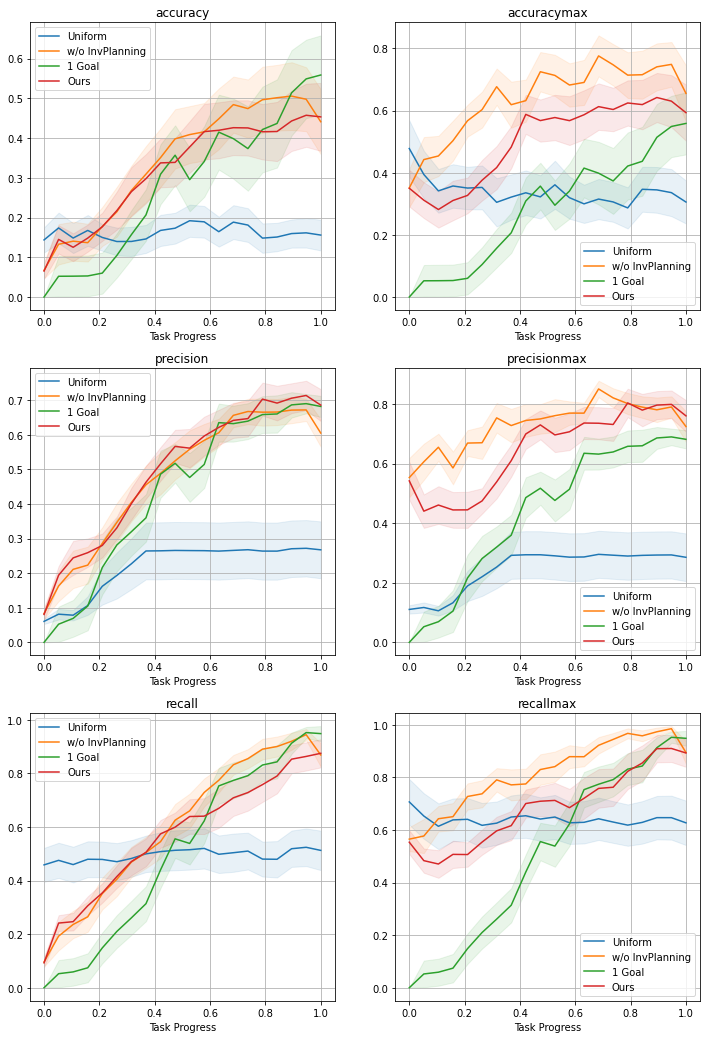

In [144]:
names = mean_metric.keys()
names = sorted([name for name in names])
fig, ax_plots = plt.subplots(int(len(names)/2), 2, figsize=(12, 3*len(names)))
names_exp = ['DET']
final_metric_dict = mean_metric
ax = plt.gca()
task_names = list(task_results_all.keys())
print(ax_plots.shape)
colors=[next(ax._get_lines.prop_cycler)['color'] for _ in range(len(task_names))]
for i, task_name in enumerate(task_names):
    color = colors[i]
    cname = task_name
    content = task_results_all[task_name][0]
    std_metric = task_results_all[task_name][1]
    
    for index, name_metric in enumerate(names):
    #         color=colors[index_exp]
        curr_ax = ax_plots[index//2, index%2]
        nb = len(content[name_metric])
        x = np.linspace(0,1,nb)
    #         print(name_metric, x.shape, mean_return.shape)
        mean_return = content[name_metric]
        mean_se = std_metric[name_metric]
        ymin = mean_return - mean_se
        ymax = mean_return + mean_se
        curr_ax.plot(x, mean_return, label=cname, color=color)
        curr_ax.fill_between(x, ymin, ymax, alpha=0.1, color=color)

        
for ind, ax in enumerate(list(ax_plots.reshape(-1))):
    
    ax.legend()
    ax.set_title(names[ind])
    ax.grid()
    ax.set_xlabel("Task Progress")

## Results overall setup table

In [148]:
epi_table = cont_tasks['test']['prepare_food']
task_names = list(paths_dict.keys())

task_results_all_table = {}
for task_name in task_names:
    curr_paths_file = build_path(task_name)
    episodes = list(sorted(set([epi[0] for epi in curr_paths_file[0] if epi[0] in epi_table])))
    mean_metric, std_metric = plot_episodes(curr_paths_file, episodes)
    task_results_all_table[task_name] = (mean_metric, std_metric)
    
# task_names = cont_tasks['test'].keys()








  0%|                                                                                                                                                                                                                                                                                                                                               | 0/4 [00:00<?, ?it/s]




 25%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                                                                     | 1/4 [00:05<00:15,  5.32s/it]




 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            

(3, 2)


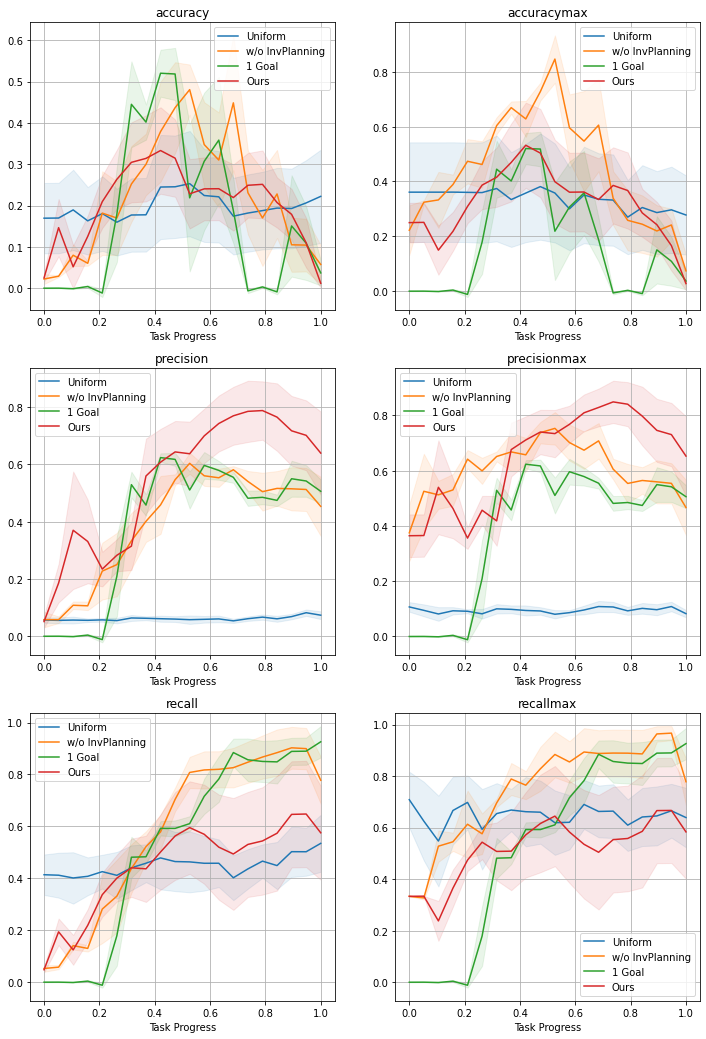

In [149]:
names = mean_metric.keys()
names = sorted([name for name in names])
fig, ax_plots = plt.subplots(int(len(names)/2), 2, figsize=(12, 3*len(names)))
names_exp = ['DET']
final_metric_dict = mean_metric
ax = plt.gca()
task_names = list(task_results_all_table.keys())
print(ax_plots.shape)
colors=[next(ax._get_lines.prop_cycler)['color'] for _ in range(len(task_names))]
for i, task_name in enumerate(task_names):
    color = colors[i]
    cname = task_name
    content = task_results_all_table[task_name][0]
    std_metric = task_results_all_table[task_name][1]
    
    for index, name_metric in enumerate(names):
    #         color=colors[index_exp]
        curr_ax = ax_plots[index//2, index%2]
        nb = len(content[name_metric])
        x = np.linspace(0,1,nb)
    #         print(name_metric, x.shape, mean_return.shape)
        mean_return = content[name_metric]
        mean_se = std_metric[name_metric]
        ymin = mean_return - mean_se
        ymax = mean_return + mean_se
        curr_ax.plot(x, mean_return, label=cname, color=color)
        curr_ax.fill_between(x, ymin, ymax, alpha=0.1, color=color)

        
for ind, ax in enumerate(list(ax_plots.reshape(-1))):
    
    ax.legend()
    ax.set_title(names[ind])
    ax.grid()
    ax.set_xlabel("Task Progress")

In [247]:
with open(tianmin[0][180,0], 'rb') as f:
    cont = pkl.load(f)

In [152]:
epi_table = cont_tasks['test']['prepare_food']
task_names = list(paths_dict.keys())

task_results_all_table = {}
task_name = task_names[-1]
print(task_name)
curr_paths_file = build_path(task_name)
    
# task_names = cont_tasks['test'].keys()


Ours


In [155]:
curr_paths_file[1]

{3: {'S': [1, 1, 1], 'L': [55, 40, 32]},
 139: {'S': [1, 1, 1], 'L': [47, 55, 106]},
 162: {'S': [1, 1, 1], 'L': [109, 62, 131]},
 180: {'S': [0, 1, 0], 'L': [250, 100, 250]},
 193: {'S': [1, 1, 1], 'L': [61, 75, 60]},
 225: {'S': [1, 1, 1], 'L': [31, 26, 24]},
 290: {'S': [1, 1, 1], 'L': [58, 60, 57]},
 304: {'S': [1, 1, 1], 'L': [43, 47, 42]},
 323: {'S': [0, 1, 1], 'L': [250, 23, 23]},
 366: {'S': [1, 1, 1], 'L': [35, 32, 29]},
 401: {'S': [1, 1, 1], 'L': [52, 46, 44]},
 419: {'S': [1, 1, 1], 'L': [22, 23, 33]},
 428: {'S': [1, 1, 1], 'L': [59, 42, 46]},
 466: {'S': [1, 1, 1], 'L': [20, 22, 21]},
 523: {'S': [1, 1, 0], 'L': [54, 53, 250]},
 556: {'S': [1, 1, 0], 'L': [53, 73, 250]},
 573: {'S': [0, 0, 1], 'L': [250, 250, 47]},
 591: {'S': [0, 0, 1], 'L': [250, 250, 59]},
 606: {'S': [1, 1, 1], 'L': [40, 39, 37]},
 621: {'S': [1, 1, 1], 'L': [26, 36, 19]}}

In [224]:
final_metric_dict = compute_metrics_episode(cont)

{('pudding', 'stove'): 2, ('salmon', 'stove'): 2, ('apple', 'stove'): 2}
[  0.           6.47368421  12.94736842  19.42105263  25.89473684
  32.36842105  38.84210526  45.31578947  51.78947368  58.26315789
  64.73684211  71.21052632  77.68421053  84.15789474  90.63157895
  97.10526316 103.57894737 110.05263158 116.52631579 123.        ]
[  0.           6.47368421  12.94736842  19.42105263  25.89473684
  32.36842105  38.84210526  45.31578947  51.78947368  58.26315789
  64.73684211  71.21052632  77.68421053  84.15789474  90.63157895
  97.10526316 103.57894737 110.05263158 116.52631579 123.        ]
[  0.           6.47368421  12.94736842  19.42105263  25.89473684
  32.36842105  38.84210526  45.31578947  51.78947368  58.26315789
  64.73684211  71.21052632  77.68421053  84.15789474  90.63157895
  97.10526316 103.57894737 110.05263158 116.52631579 123.        ]
[  0.           6.47368421  12.94736842  19.42105263  25.89473684
  32.36842105  38.84210526  45.31578947  51.78947368  58.26315789


In [122]:
final_metric_dict.keys()

dict_keys(['recall', 'recallmax', 'accuracy', 'accuracymax', 'precision', 'precisionmax'])

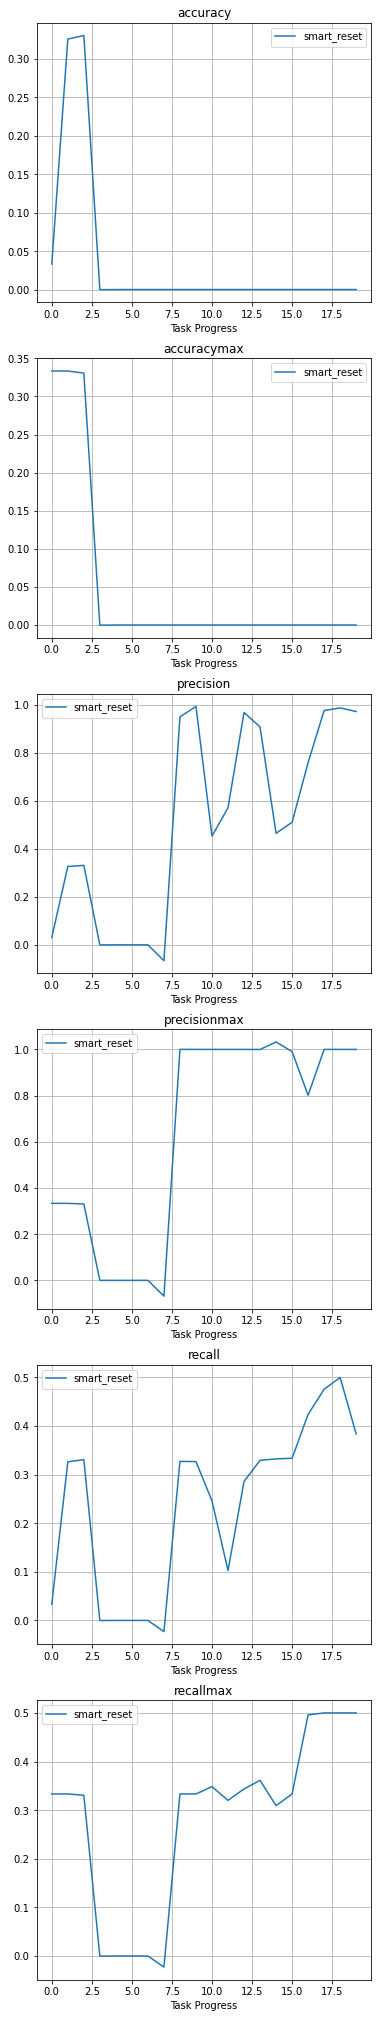

In [248]:
names = final_metric_dict.keys()
names = sorted([name for name in names])
fig, ax_plots = plt.subplots(len(names), 1, figsize=(6, 6*len(names)))
names_exp = ['DET']

ax = plt.gca()
colors=[next(ax._get_lines.prop_cycler)['color'] for _ in range(len(names_exp))]
# plt.close()
for i in range(1):
    color = colors[i]
    if i == 0:
        content = final_metric_dict
        cname = 'smart_reset'
    elif i == 1:
        content = cont['all_reset']
        cname = 'all_reset'
    if i < 2:
        for index, name_metric in enumerate(names):
        #         color=colors[index_exp]
            curr_ax = ax_plots[index]
            nb = len(content[name_metric])
            x = np.arange(nb)
        #         print(name_metric, x.shape, mean_return.shape)
            mean_return = content[name_metric]
            curr_ax.plot(x, mean_return, label=cname, color=color)
    else:
        for index, name_metric in enumerate(names):
            curr_ax = ax_plots[index]
            nb = len(final_res[name_metric+'_tsteps_mean'])
            x = np.arange(nb)
    #         print(name_metric, x.shape, mean_return.shape)
            mean_return = final_res[name_metric+'_tsteps_mean']
            mean_se = final_res[name_metric+'_tsteps_std']
    #         mean_se = all_se.mean(0)
            ymin = mean_return - mean_se
            ymax = mean_return + mean_se
            curr_ax.plot(x, mean_return, label='Net pred offline', color=color)
    #         curr_ax.plot(x, all_max.mean(0), '--', color=color)
            curr_ax.fill_between(x, ymin, ymax, alpha=0.2, color=color)
        
for ind, ax in enumerate(ax_plots):
    ax.legend()
    ax.set_title(names[ind])
    ax.grid()
    ax.set_xlabel("Task Progress")

In [84]:
cont['proposals'][-1][0]['pred'][-1][0]

{('chips', 'coffeetable'): 1,
 ('condimentbottle', 'coffeetable'): 1,
 ('remotecontrol', 'coffeetable'): 1,
 ('character', 'livingroom'): 1}

In [69]:
with open('../../outputs/debug_helping_fastwalk_states_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.323_iter.0.pik', 'rb') as f:
    cont = pkl.load(f)

In [ ]:
# with open('/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences/outputs/helping_states_fastwalk_r_1_3_ip0_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.180_iter.0.pik', 'rb') as f:
#     cont = pkl.load(f)
# print(cont['action'][0])

def print_action(cont, action):
    print(', '.join(['{}: {}'.format(key, elem['count']) for key, elem in cont['gt_goals'].items()]))
    length = max(len(action[0]), len(action[1]))
    print(len(action[0]), len(action[1]))
    for i in range(length):
        if i >= len(action[0]): a1 = None
        else: a1 = action[0][i]
        if i >= len(action[1]): a2 = None
        else: a2 = action[1][i]
        if a1 is None: a1 = ''
        if a2 is None: a2 = ''
        print('{: <3}: {: <50} | {: <50}'.format(i, a1, a2))
        
def print_action_2(cont, action):
    print(', '.join(['{}: {}'.format(key, elem['count']) for key, elem in cont['gt_goals'].items()]))
    length = max(len(action[0]), len(action[1]))
    print(len(action[0]), len(action[1]))
    for i in range(length):
        if i >= len(action[0]): a1 = None
        else: 
            try:
                a1 = action[0][i][0]
            except:
                a1 = None
        if i >= len(action[1]): a2 = None
        else: 
            try:
                a2 = action[1][i][1]
            except:
                a2 = None
        if a1 is None: a1 = ''
        if a2 is None: a2 = ''
        print('{: <3}: {: <50} | {: <50}'.format(i, a1, a2))
        
print_action_2(cont, cont['executed_action'])

In [84]:
with open(tianmin[0][323,0], 'rb') as f:
    cont = pkl.load(f)
print_action(cont, cont['action'])
new_dict = {0: [ct[0] for ct in cont['executed_action'][0]], 1:  [ct[1] if 1 in ct else "" for ct in cont['executed_action'][0]]}
print_action(cont, new_dict)
#print_action(cont, cont['executed_action'])

inside_plate_104: 2, inside_waterglass_104: 3
250 250
0  : [walktowards] <kitchen> (11)                       |                                                   
1  : [walktowards] <kitchen> (11)                       |                                                   
2  : [walktowards] <kitchen> (11)                       |                                                   
3  : [walktowards] <kitchencabinet> (73)                |                                                   
4  : [walktowards] <kitchencabinet> (73)                |                                                   
5  : [walktowards] <kitchencabinet> (73)                |                                                   
6  : [walktowards] <kitchencabinet> (73)                |                                                   
7  : [walktowards] <kitchencabinet> (73)                |                                                   
8  : [walktowards] <kitchencabinet> (73)                |                 

In [66]:
[edge for edge in cont['graph'][32]['edges'] if edge['from_id'] == 372]

[{'from_id': 372, 'to_id': 1, 'relation_type': 'CLOSE'},
 {'from_id': 372, 'to_id': 11, 'relation_type': 'INSIDE'}]

In [58]:
cont.keys()

dict_keys(['task_id', 'env_id', 'task_name', 'gt_goals', 'goals', 'action', 'executed_action', 'plan', 'subgoal', 'finished', 'init_unity_graph', 'goals_finished', 'belief', 'belief_room', 'belief_graph', 'graph', 'obs', 'graph_results', 'helping_subgoal', 'opponent_subgoal', 'proposals'])

In [50]:
tianmin[0][466,0]

'/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences//outputs/helping_states_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik'

In [165]:
ls -lt '/data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences//outputs/helping_states_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik'


-rw-rw-r-- 1 tshu vision-torralba 19667237 May  2 01:28 /data/vision/torralba/frames/data_acquisition/SyntheticStories/agent_preferences/tshu/agent_preferences//outputs/helping_states_1_3_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik


In [47]:
with open(gt[0][401,0], 'rb') as f:
    cont = pkl.load(f)
    print_action(cont, cont['action'])

inside_pudding_103: 5
78 78
0  : [walktowards] <pudding> (368)                      | [walktowards] <kitchen> (11)                      
1  : [grab] <pudding> (368)                             | [walktowards] <kitchen> (11)                      
2  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
3  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
4  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
5  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
6  : [open] <fridge> (103)                              | [walktowards] <livingroom> (267)                  
7  : [putin] <pudding> (368) <fridge> (103)             | [walktowards] <livingroom> (267)                  
8  : [walktowards] <livingroom> (267)                   | [walktowards] <livingroom> (267)          

In [35]:
gt[0][139,0]

'/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences//outputs/helping_gt_goal/test_env_task_set_60_full_task.all/logs_episode.139_iter.0.pik'

In [1]:
ls -lt '/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences//outputs/helping_gt_goal/test_env_task_set_60_full_task.all/logs_episode.139_iter.0.pik'


-rw-rw-r-- 1 xavierpuig vision-torralba 10810352 May  1 23:25 /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences//outputs/helping_gt_goal/test_env_task_set_60_full_task.all/logs_episode.139_iter.0.pik


In [39]:
with open(gt[0][401,0], 'rb') as f:
    cont = pkl.load(f)
    print_action(cont, cont['action'])

inside_pudding_103: 5
78 78
0  : [walktowards] <pudding> (368)                      | [walktowards] <kitchen> (11)                      
1  : [grab] <pudding> (368)                             | [walktowards] <kitchen> (11)                      
2  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
3  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
4  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
5  : [walktowards] <fridge> (103)                       | [walktowards] <livingroom> (267)                  
6  : [open] <fridge> (103)                              | [walktowards] <livingroom> (267)                  
7  : [putin] <pudding> (368) <fridge> (103)             | [walktowards] <livingroom> (267)                  
8  : [walktowards] <livingroom> (267)                   | [walktowards] <livingroom> (267)          

In [103]:
with open(tianmin[0][466,0], 'rb') as f:
    cont = pkl.load(f)
    print_action(cont, cont['action'])

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
250 248
0  : [grab] <pudding> (382)                             |                                                   
1  : [walktowards] <fridge> (166)                       |                                                   
2  : [walktowards] <fridge> (166)                       |                                                   
3  : [walktowards] <fridge> (166)                       |                                                   
4  : [walktowards] <fridge> (166)                       |                                                   
5  : [open] <fridge> (166)                              |                                                   
6  : [putin] <pudding> (382) <fridge> (166)             | [walk] <kitchen> (56)                             
7  : [open] <fridge> (165)                              | [walk] <pudding> (382)                            
8  : [grab] <cupcake> (380)                          

In [10]:
ls -lt /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/outputs/helping_states_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik

-rw-rw-r-- 1 xavierpuig vision-torralba 7318298 May  3 00:16 /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/outputs/helping_states_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik


In [12]:
import pickle as pkl
with open('/data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/outputs/debug_helping_states_ip1_detfull_encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik', 'rb') as f:
    cont = pkl.load(f)

In [181]:
with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
        'online_wah/agent_preferences/outputs/helping_states_0_5_ip1_detfull_'
        'encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/'
           'logs_episode.466_iter.0.pik'), 'rb') as f:
    cont = pkl.load(f)

In [182]:
cont['helping_subgoal']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
print_action(cont, cont['action'])

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
21 21
0  : [walktowards] <pudding> (382)                      |                                                   
1  : [walktowards] <pudding> (382)                      |                                                   
2  : [grab] <pudding> (382)                             |                                                   
3  : [walktowards] <fridge> (166)                       |                                                   
4  : [walktowards] <fridge> (166)                       |                                                   
5  : [walktowards] <fridge> (166)                       |                                                   
6  : [walktowards] <fridge> (166)                       |                                                   
7  : [open] <fridge> (166)                              |                                                   
8  : [putin] <pudding> (382) <fridge> (166)            

In [180]:
print_action_2(cont, cont['executed_action'])

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
17 17
0  : [open] <microwave> (167)                           |                                                   
1  : [grab] <salmon> (381)                              |                                                   
2  : [walktowards] <fridge> (166)                       |                                                   
3  : [walktowards] <fridge> (166)                       |                                                   
4  : [open] <fridge> (166)                              |                                                   
5  : [putin] <salmon> (381) <fridge> (166)              |                                                   
6  : [walktowards] <pudding> (382)                      |                                                   
7  : [walktowards] <pudding> (382)                      |                                                   
8  : [walktowards] <pudding> (382)                     

In [78]:
cont['executed_action'][0]

[{0: '[walktowards] <pudding> (382)'},
 {0: '[walktowards] <pudding> (382)'},
 {0: '[grab] <pudding> (382)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[open] <fridge> (166)'},
 {0: '[putin] <pudding> (382) <fridge> (166)'},
 {0: '[open] <fridge> (165)'},
 {0: '[grab] <cupcake> (380)', 1: '[walk] <kitchen> (56)'},
 {0: '[walktowards] <fridge> (166)', 1: '[walk] <pudding> (382)'},
 {0: '[putin] <cupcake> (380) <fridge> (166)', 1: '[grab] <pudding> (382)'},
 {0: '[walktowards] <microwave> (167)', 1: '[grab] <cupcake> (380)'},
 {0: '[walktowards] <microwave> (167)',
  1: '[putin] <cupcake> (380) <fridge> (165)'},
 {0: '[walktowards] <microwave> (167)'},
 {0: '[open] <microwave> (167)'},
 {0: '[grab] <salmon> (381)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[walktowards] <fridge> (166)'},
 {0: '[putin] <salmon> (381) <fridge> (166)'},

In [74]:
cont['action']

{0: ['[walktowards] <pudding> (382)',
  '[grab] <pudding> (382)',
  '[walktowards] <fridge> (166)',
  '[walktowards] <fridge> (166)',
  '[walktowards] <fridge> (166)',
  '[walktowards] <fridge> (166)',
  '[open] <fridge> (166)',
  '[putin] <pudding> (382) <fridge> (166)',
  '[open] <fridge> (165)',
  '[grab] <cupcake> (380)',
  '[walktowards] <fridge> (166)',
  '[putin] <cupcake> (380) <fridge> (166)',
  '[walktowards] <microwave> (167)',
  '[walktowards] <microwave> (167)',
  '[walktowards] <microwave> (167)',
  '[open] <microwave> (167)',
  '[grab] <salmon> (381)',
  '[walktowards] <fridge> (166)',
  '[walktowards] <fridge> (166)',
  '[putin] <salmon> (381) <fridge> (166)',
  '[grab] <cupcake> (380)',
  '[putin] <cupcake> (380) <fridge> (166)',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  N

In [8]:
def print_action(cont, action):
    print(', '.join(['{}: {}'.format(key, elem['count']) for key, elem in cont['gt_goals'].items()]))
    length = max(len(action[0]), len(action[1]))
    print(len(action[0]), len(action[1]))
    for i in range(length):
        if i >= len(action[0]): a1 = None
        else: a1 = action[0][i]
        if i >= len(action[1]): a2 = None
        else: a2 = action[1][i]
        if a1 is None: a1 = ''
        if a2 is None: a2 = ''
        print('{: <3}: {: <50} | {: <50}'.format(i, a1, a2))
        
def print_action_2(cont, action):
    print(', '.join(['{}: {}'.format(key, elem['count']) for key, elem in cont['gt_goals'].items()]))
    length = max(len(action[0]), len(action[1]))
    print(len(action[0]), len(action[1]))
    for i in range(length):
        if i >= len(action[0]): a1 = None
        else: 
            try:
                a1 = action[0][i][0]
            except:
                a1 = None
        if i >= len(action[1]): a2 = None
        else: 
            try:
                a2 = action[1][i][1]
            except:
                a2 = None
        if a1 is None: a1 = ''
        if a2 is None: a2 = ''
        print('{: <3}: {: <50} | {: <50}'.format(i, a1, a2))

In [20]:
ls -lt /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/outputs/helping_gt_goal/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik

-rw-rw-r-- 1 xavierpuig vision-torralba 3609716 May  3 18:05 /data/vision/torralba/frames/data_acquisition/SyntheticStories/online_wah/agent_preferences/outputs/helping_gt_goal/test_env_task_set_60_full_task.all/logs_episode.466_iter.0.pik


In [21]:
# with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
#         'online_wah/agent_preferences/outputs/helping_states_0_5_ip1_detfull_'
#         'encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/'
#            'logs_episode.466_iter.0.pik'), 'rb') as f:
#     cont = pkl.load(f)

with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
        'online_wah/agent_preferences/outputs/helping_gt_goal/test_env_task_set_60_full_task.all/'
           'logs_episode.466_iter.0.pik'), 'rb') as f:
    cont = pkl.load(f)


# helping_gt_goal

In [22]:
print_action_2(cont, cont['executed_action'])

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
13 13
0  : [walktowards] <pudding> (382)                      | [walktowards] <kitchen> (56)                      
1  : [walktowards] <pudding> (382)                      | [walktowards] <kitchen> (56)                      
2  : [grab] <pudding> (382)                             | [walktowards] <kitchen> (56)                      
3  : [walktowards] <fridge> (166)                       | [walktowards] <microwave> (167)                   
4  : [walktowards] <fridge> (166)                       | [open] <microwave> (167)                          
5  : [walktowards] <fridge> (166)                       | [grab] <salmon> (381)                             
6  : [walktowards] <fridge> (166)                       | [walktowards] <fridge> (166)                      
7  : [open] <fridge> (166)                              |                                                   
8  : [putin] <pudding> (382) <fridge> (166)            

In [23]:
print_action(cont, cont['action'])

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
13 13
0  : [walktowards] <pudding> (382)                      | [walktowards] <kitchen> (56)                      
1  : [walktowards] <pudding> (382)                      | [walktowards] <kitchen> (56)                      
2  : [grab] <pudding> (382)                             | [walktowards] <kitchen> (56)                      
3  : [walktowards] <fridge> (166)                       | [walktowards] <microwave> (167)                   
4  : [walktowards] <fridge> (166)                       | [open] <microwave> (167)                          
5  : [walktowards] <fridge> (166)                       | [grab] <salmon> (381)                             
6  : [walktowards] <fridge> (166)                       | [walktowards] <fridge> (166)                      
7  : [open] <fridge> (166)                              | [walktowards] <fridge> (166)                      
8  : [putin] <pudding> (382) <fridge> (166)            

In [218]:
# with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
#         'online_wah/agent_preferences/outputs/helping_states_0_5_ip1_detfull_'
#         'encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/'
#            'logs_episode.466_iter.0.pik'), 'rb') as f:
#     cont = pkl.load(f)

with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
        'online_wah/agent_preferences/outputs/helping_gt_goal_fast/test_env_task_set_60_full_task.all/'
           'logs_episode.466_iter.0.pik'), 'rb') as f:
    cont = pkl.load(f)

print_action(cont, cont['action'])
print('-----')
print_action_2(cont, cont['executed_action'])

# helping_gt_goal

inside_cupcake_166: 1, inside_salmon_166: 1, inside_pudding_166: 1
11 11
0  : [open] <fridge> (165)                              | [walktowards] <kitchen> (56)                      
1  : [grab] <cupcake> (380)                             | [walktowards] <pudding> (382)                     
2  : [walktowards] <fridge> (166)                       | [grab] <pudding> (382)                            
3  : [open] <fridge> (166)                              | [walktowards] <fridge> (166)                      
4  : [walktowards] <microwave> (167)                    | [walktowards] <fridge> (166)                      
5  : [walktowards] <microwave> (167)                    | [walktowards] <fridge> (166)                      
6  : [open] <microwave> (167)                           | [putin] <pudding> (382) <fridge> (166)            
7  : [grab] <salmon> (381)                              | [walktowards] <salmon> (381)                      
8  : [walktowards] <fridge> (166)                      

In [219]:
# with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
#         'online_wah/agent_preferences/outputs/helping_states_0_5_ip1_detfull_'
#         'encoder_task_graph_20_1.0_1.0_5.0/test_env_task_set_60_full_task.all/'
#            'logs_episode.466_iter.0.pik'), 'rb') as f:
#     cont = pkl.load(f)

with open(('/data/vision/torralba/frames/data_acquisition/SyntheticStories/'
        'online_wah/agent_preferences/outputs/helping_gt_goal_fast/test_env_task_set_60_full_task.all/'
           'logs_episode.180_iter.0.pik'), 'rb') as f:
    cont = pkl.load(f)

print_action(cont, cont['action'])
print('-----')
print_action_2(cont, cont['executed_action'])

# helping_gt_goal

inside_pudding_105: 2, inside_salmon_105: 2, inside_apple_105: 2
250 250
0  : [walktowards] <kitchen> (11)                       | [walktowards] <fridge> (103)                      
1  : [walktowards] <kitchen> (11)                       | [walktowards] <fridge> (103)                      
2  : [walktowards] <kitchen> (11)                       | [open] <fridge> (103)                             
3  : [walktowards] <kitchen> (11)                       | [grab] <apple> (371)                              
4  : [walktowards] <kitchen> (11)                       | [walktowards] <stove> (105)                       
5  : [grab] <salmon> (369)                              | [open] <stove> (105)                              
6  : [walktowards] <livingroom> (267)                   | [putin] <apple> (371) <stove> (105)               
7  : [walktowards] <livingroom> (267)                   | [walktowards] <salmon> (368)                      
8  : [walktowards] <livingroom> (267)                  

In [220]:
print_action_2(cont, cont['executed_action'])

inside_pudding_105: 2, inside_salmon_105: 2, inside_apple_105: 2
250 250
0  : [walktowards] <kitchen> (11)                       | [walktowards] <fridge> (103) :3:                  
1  : [walktowards] <kitchen> (11)                       | [walktowards] <fridge> (103) :3:                  
2  : [walktowards] <kitchen> (11)                       | [open] <fridge> (103)                             
3  : [walktowards] <kitchen> (11)                       | [grab] <apple> (371)                              
4  : [walktowards] <kitchen> (11)                       | [walktowards] <stove> (105) :3:                   
5  : [grab] <salmon> (369)                              | [open] <stove> (105)                              
6  : [walktowards] <livingroom> (267)                   | [putin] <apple> (371) <stove> (105)               
7  : [walktowards] <livingroom> (267)                   | [walktowards] <salmon> (368) :3:                  
8  : [walktowards] <livingroom> (267)                  

In [ ]:
# Speedup x Metric

# Online Goal Inference

## Metrics Speedup

In [2]:
import matplotlib.pyplot as plt
import brokenaxes
import pickle as pkl

In [29]:
with open('../../results_eval_helping.pik', 'rb') as f:
    results = pkl.load(f)
print(results.keys())

dict_keys(['GT', 'Main', 'DET'])


In [11]:
results

{'GT': {'all': {'SR': [1.0, 0.0],
   'AL': [31.449999999999996, 2.7882964731574402],
   'SP': [2.1910045169270584, 0.12630560249489298],
   'Reward': [0.8742000000000001, 0.01115318589262976]},
  'setup_table': {'SR': [1.0, 0.0],
   'AL': [33.33333333333333, 2.9273613450417155],
   'SP': [2.6395984573213487, 0.27472116168119226],
   'Reward': [0.8666666666666667, 0.011709445380166869]},
  'put_dishwasher': {'SR': [1.0, 0.0],
   'AL': [30.0, 5.781916252900552],
   'SP': [2.0812954492141684, 0.0998380963951462],
   'Reward': [0.88, 0.02312766501160224]},
  'put_fridge': {'SR': [1.0, 0.0],
   'AL': [27.166666666666668, 6.848053251350586],
   'SP': [2.0686429550304726, 0.2161238312014714],
   'Reward': [0.8913333333333334, 0.02739221300540232]},
  'prepare_food': {'SR': [1.0, 0.0],
   'AL': [40.666666666666664, 7.5249584716462055],
   'SP': [1.9030112044817928, 0.2762700945493552],
   'Reward': [0.8373333333333334, 0.030099833886584815]},
  'watch_tv': {'SR': [1.0, 0.0],
   'AL': [26.08333

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[1.0, 0.0] [2.1910045169270584, 0.12630560249489298]
[0.99, 0.0099498743710662] [1.0, 0.0]
[0.95, 0.04873397172404482] [1.4332285162043954, 0.10472861240827305]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


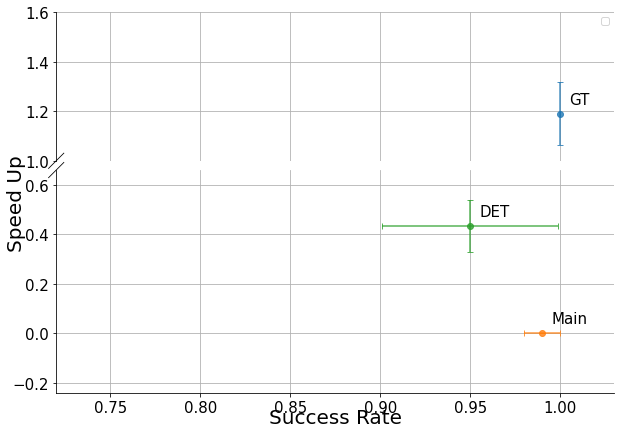

In [30]:
from matplotlib import pyplot as plt
import brokenaxes
fig = plt.figure(figsize=(10,7))

alph = 0.8
bax = brokenaxes.brokenaxes(ylims=((-0.24, 0.66), (1.0, 1.6)), hspace=.05)
for method_name, result in results.items():
    res = result['all']
    
    bax.errorbar(res['SR'][0], res['SP'][0]-1, xerr=res['SR'][1], 
                 yerr=res['SP'][1], label=method_name, alpha=alph, fmt='--o', capsize=3)
    bax.annotate(method_name, (res['SR'][0]+0.005, res['SP'][0]-1+0.04), fontsize=15)

    print(res['SR'], res['SP'])
        
bax.set_xlabel('Success Rate', fontsize=20)
bax.set_xlim(0.72, 1.03)

bax.set_ylabel('Speed Up', fontsize=20)
# bax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# ax.set_xticklabels(labels, fontsize=17, rotation=12)
# print(classes)


# plt.legend(loc='upper center', ncol=5, fontsize=15)

bax.tick_params(axis='both', which='major', labelsize=15)


# bax.set_xticks(fontsize=12)
# plt.yticks(fontsize=12)
# bax.grid()
bax.grid(axis='both', which='major', ls='-')
bax.grid(axis='both', which='minor', ls='--', alpha=0.5)

# plt.grid()
# plt.tight_layout()
plt.savefig('scatter_plot_filter_slides_2.eps')

plt.legend()

In [32]:
classes = results['GT'].keys()
methods = results.keys()
print(task_names)

dict_keys(['all', 'setup_table', 'put_dishwasher', 'put_fridge', 'prepare_food', 'watch_tv'])


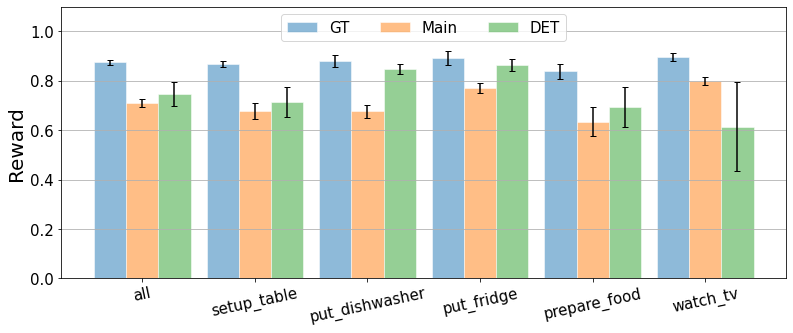

In [33]:
fig = plt.figure(figsize=(13,5))
ax = fig.subplots()

w = 14
x_pos = np.arange(len(classes)) * len(methods) * w
metric = 'SWS'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

iter_col = 0
for it, (method_name, result) in enumerate(results.items()):
    
    method = method_name
    offset = it + 0.5 - len(methods)/2
    wb = w * 12
    iter_col += 1
    if iter_col == len(colors):
        iter_col = 0
    curr_col = colors[iter_col]
    method = method.replace('randomgoal', 'randomgoal_corrected')

    x = [result[task]['Reward'][0] for task in task_names]
    xerr = [result[task]['Reward'][1] for task in task_names]
    ax.bar(x_pos*w+offset*wb,  x, width=wb*1.0,
           yerr=xerr, label=method,
           align='center', alpha=0.5, ecolor='black', capsize=3, edgecolor='white')
ax.set_xticks(x_pos*w)
ax.set_ylim([0., 1.1])

# labels = ['Set table', 'Put Groceries', 'Set Meal', 'Wash Dishes', 'Read Book', 'Overall']
labels = task_names
ax.set_xticklabels(labels, fontsize=17, rotation=12)
# print(classes)
plt.ylabel(r'Reward', fontsize=20)


plt.legend(loc='upper center', ncol=5, fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
# matplotlib.rc('xtick', labelsize=20
plt.grid(axis='y')

# plt.grid(True, linestyle='--', axis='y')
plt.savefig('reward_plot_all.pdf')


In [ ]:
# Check if episodes are unity failure
# Recall/Precision plots for goal accuray
# Measure mesiness env
# Uniform proposal